In [25]:
import sys
import os
import pandas as pd
import numpy as np
import random
sys.path.append("../")


In [26]:
def resample_data(df, time_window):
    print(f"[*] Resampling data based on {time_window} time window")
    df_remove_dup = df.drop_duplicates('time', keep='first', inplace=False, ignore_index=True)
    resampled_data = pd.DataFrame()
    resampler = df_remove_dup.set_index('time').resample(time_window)
    resampled_groups = resampler.groups
    for key in resampled_groups:
        indices = resampler._get_index(key)
        # If there are values in the group bin
        if len(indices):
            # Pick a random value from the group
            indx_choice = [np.random.choice(indices)]
            # Get the picked value from df
            value_df = df_remove_dup.take(indx_choice)
            resampled_data = pd.concat([resampled_data, value_df])      
    print("Done")
    return resampled_data

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')
path="gdrive/My Drive/Colab Notebooks/Big_Data_AQI_Estimation-master/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# MNR AIR Data set

**1. Processed_sensor_data**

In [28]:
#step 1: read data
MNR_air_data_path = path + "Data Processed/MNR Air Processed/"
MNR_air_resampled_path = os.path.join(MNR_air_data_path, "30S Resampled")
MNR_air_sensor_data_resampled_raw = pd.read_csv(os.path.join(MNR_air_resampled_path, "MNR_AIR_sensor_data_resampled_raw.csv"))
MNR_air_sensor_data_resampled_processed = pd.read_csv(os.path.join(MNR_air_resampled_path, "MNR_AIR_sensor_data_resampled_processed.csv"))
MNR_air_sensor_data_resampled_labels = pd.read_csv(os.path.join(MNR_air_resampled_path, "MNR_AIR_sensor_data_resampled_labels.csv"))

In [29]:
MNR_air_sensor_data_resampled_processed.head()

,timestamp,hum,tem,uv,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Late Night,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport
0,2020-07-12 04:40:12,31.0,28,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.697310
1,2020-07-12 04:40:33,31.0,28,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.693019
2,2020-07-12 04:41:01,31.0,28,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.688030
3,2020-07-12 04:41:54,32.0,29,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.693253
4,2020-07-12 04:42:19,31.0,28,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.680793


In [30]:
MNR_air_sensor_data_resampled_labels.head()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,0,0.007,3.0,5.0,1.3,10.0,0,7.0,16.233766,0
1,0,0.006,3.0,5.0,1.3,10.0,0,7.0,16.233766,0
2,0,0.007,3.0,4.0,1.3,10.0,0,7.0,14.772727,0
3,0,0.007,3.0,4.0,1.3,10.0,0,7.0,14.772727,0
4,0,0.008,3.0,5.0,1.3,10.0,0,7.0,16.233766,0


In [31]:
#Step 2: Statistical Analysis
MNR_air_sensor_data_resampled_processed.describe()

,hum,tem,uv,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Late Night,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport
count,8059.000000,8059.000000,8059.000000,8059.000000,8059.000000,8059.000000,8059.000000,8059.000000,8059.000000,8059.000000,8059.000000
mean,64.768334,33.192704,52.036605,0.158332,0.038590,0.340861,0.004963,0.457253,0.316541,0.683459,7.052453
std,83.105690,2.203129,127.507741,0.365075,0.192629,0.474028,0.070281,0.498200,0.465155,0.465155,1.426439
min,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.242836
25%,58.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.114708
50%,63.000000,33.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.857062
75%,71.000000,35.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,7.617628
max,7474.000000,46.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.081435


In [32]:
MNR_air_sensor_data_resampled_labels.describe()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
count,8059.0,8059.000000,8058.000000,8059.000000,8059.000000,8059.000000,8059.0,8059.000000,8059.000000,8059.000000
mean,0.0,0.007752,17.092455,24.936965,6.581040,26.078173,0.0,6.988708,82.904789,1.054970
std,0.0,0.007362,43.141250,66.648212,11.238123,13.343053,0.0,1.299616,69.100610,1.082857
min,0.0,0.000000,0.000000,0.000000,1.200000,0.000000,0.0,0.000000,3.246753,0.000000
25%,0.0,0.003000,4.000000,3.000000,3.700000,21.000000,0.0,7.000000,48.701299,0.000000
50%,0.0,0.006000,6.000000,6.000000,6.700000,28.000000,0.0,7.000000,76.000000,1.000000
75%,0.0,0.010000,9.000000,11.000000,7.500000,34.000000,0.0,7.000000,84.000000,1.000000
max,0.0,0.091000,393.000000,399.000000,201.400000,99.000000,0.0,15.000000,443.982456,5.000000


In [33]:
#Step 3: Plotting statistics
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=20, 20

In [34]:
# Combine labels with data
MNR_air_sensor_data_resampled_processed_combine = pd.concat([MNR_air_sensor_data_resampled_processed, MNR_air_sensor_data_resampled_labels], axis=1)

In [35]:
MNR_air_sensor_data_resampled_processed_combine.isnull().sum()

timestamp                    0
hum                          0
tem                          0
uv                           0
part_of_day_Afternoon        0
part_of_day_Early Morning    0
part_of_day_Evening          0
part_of_day_Late Night       0
part_of_day_Morning          0
Not rush hour                0
Rush hour                    0
distance_to_airport          0
o3_8                         0
o3                           0
pm10                         1
pm25                         0
co                           0
so2                          0
so2_24                       0
no2                          0
aqi                          0
aqi_rank                     0
dtype: int64

In [36]:
MNR_air_sensor_data_resampled_processed_combine.head()

,timestamp,hum,tem,uv,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Late Night,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,2020-07-12 04:40:12,31.0,28,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.697310,0,0.007,3.0,5.0,1.3,10.0,0,7.0,16.233766,0
1,2020-07-12 04:40:33,31.0,28,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.693019,0,0.006,3.0,5.0,1.3,10.0,0,7.0,16.233766,0
2,2020-07-12 04:41:01,31.0,28,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.688030,0,0.007,3.0,4.0,1.3,10.0,0,7.0,14.772727,0
3,2020-07-12 04:41:54,32.0,29,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.693253,0,0.007,3.0,4.0,1.3,10.0,0,7.0,14.772727,0
4,2020-07-12 04:42:19,31.0,28,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.680793,0,0.008,3.0,5.0,1.3,10.0,0,7.0,16.233766,0


In [37]:
# Compute the correlation between our features with aqi values and aqi ranks
# First need to drop unecessary columns
# Here we remove all columns that we are not used as features in the models
MNR_air_sensor_data_resampled_processed_combine_drop = MNR_air_sensor_data_resampled_processed_combine.drop(columns=\
                                                                                                    ["timestamp", "o3_8", "o3", "pm10", \
                                                                                                     "pm25", "co", "so2", "so2_24", "no2"])
aqi_values = MNR_air_sensor_data_resampled_processed_combine_drop[["aqi"]]
aqi_ranks = MNR_air_sensor_data_resampled_processed_combine_drop[["aqi_rank"]]

corr_matrix = MNR_air_sensor_data_resampled_processed_combine_drop.corr()

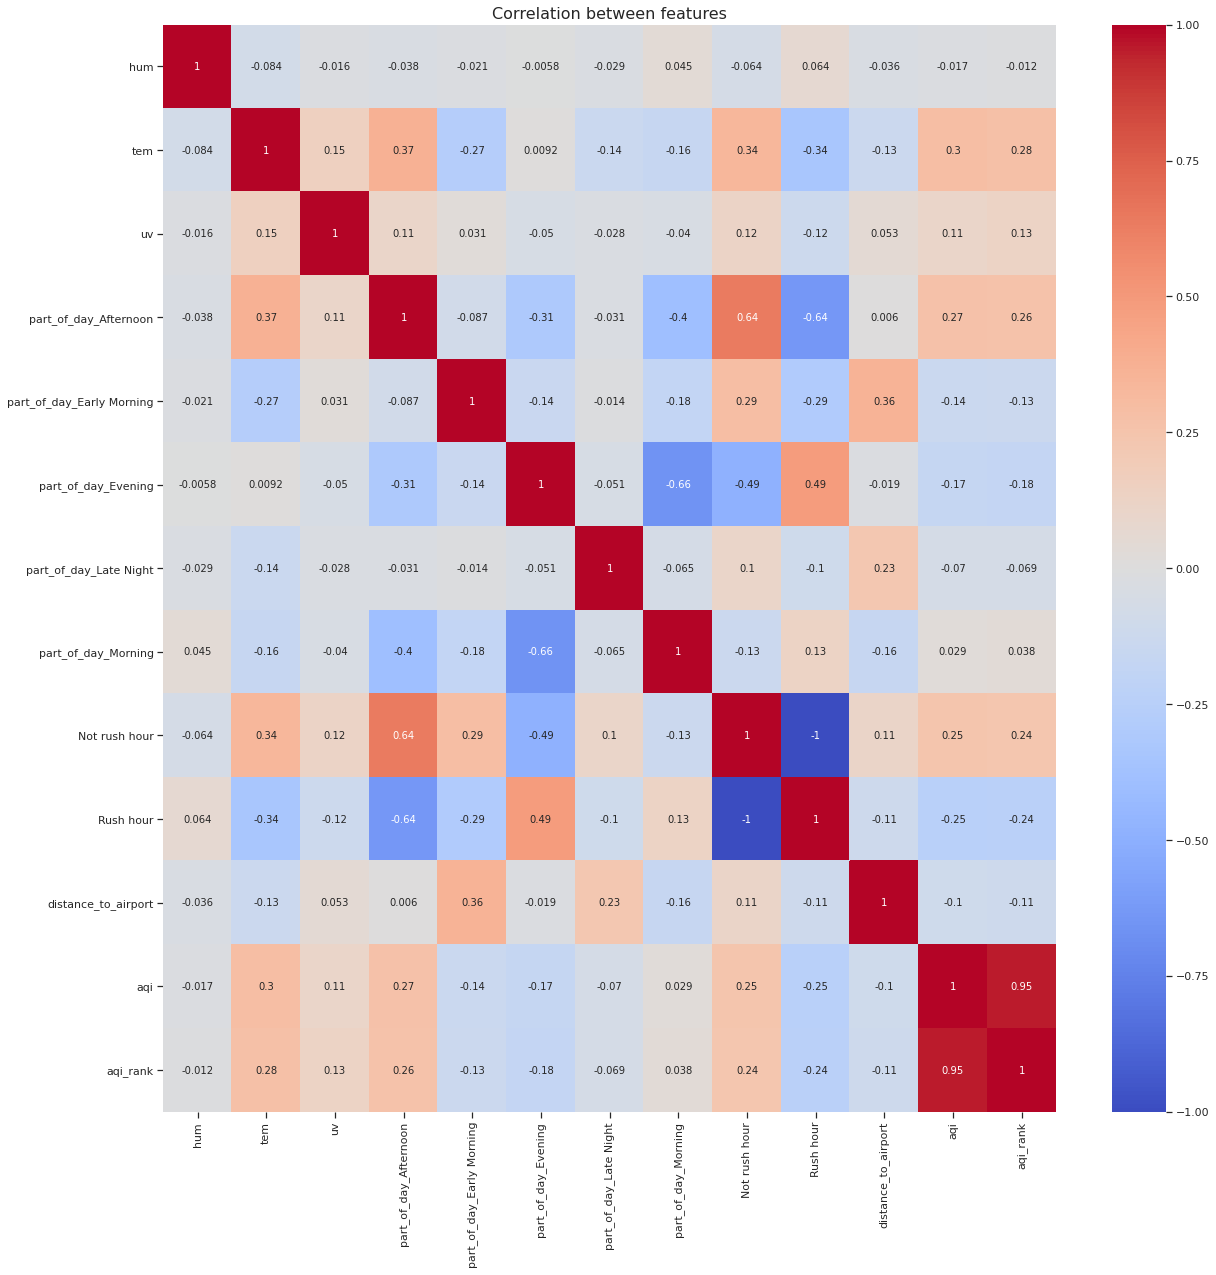

In [38]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between features', fontsize=16)
plt.show()

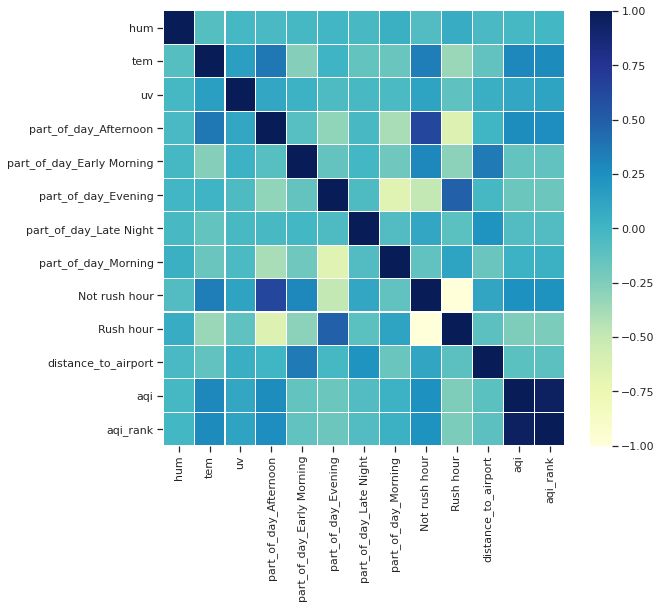

In [39]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [40]:
line_colors = [(31,119,180), (255, 127, 14), (44, 160, 44), (214, 39, 40), (148, 103, 189), 
             (177, 3, 24), (0, 107 , 164), (65, 68, 81)]
             
scatter_colors = [(174,199,232), (255,187,120), (152,223,138), (255,152,150), 
                  (197,176,213), (196,156,148), (247,182,210), (199,199,199), 
                  (158,218,229)]
  
for i in range(len(line_colors)):  
    r, g, b = line_colors[i]  
    line_colors[i] = (r / 255., g / 255., b / 255.)
for i in range(len(scatter_colors)):  
    r, g, b = scatter_colors[i]  
    scatter_colors[i] = (r / 255., g / 255., b / 255.)

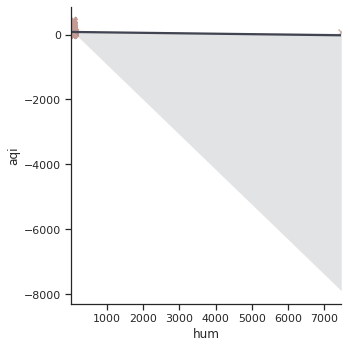

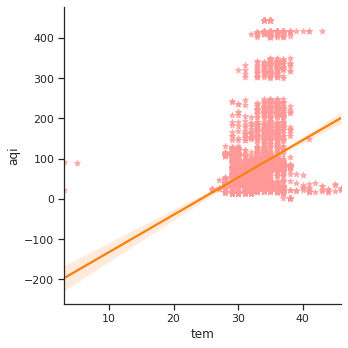

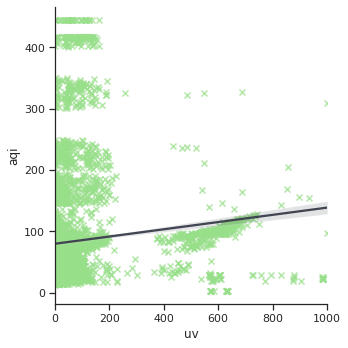

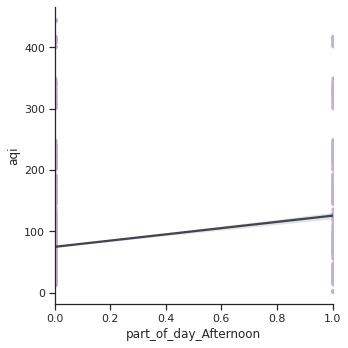

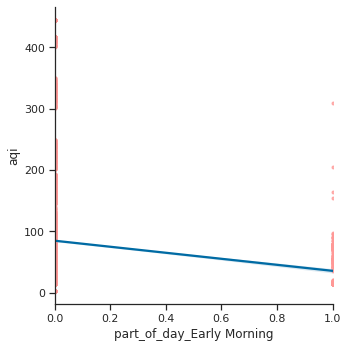

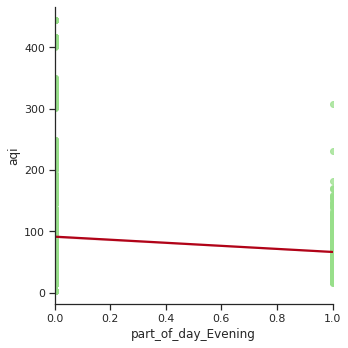

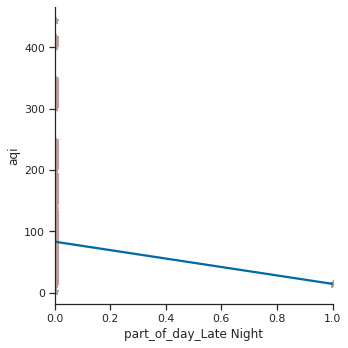

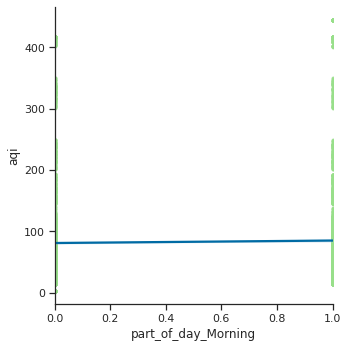

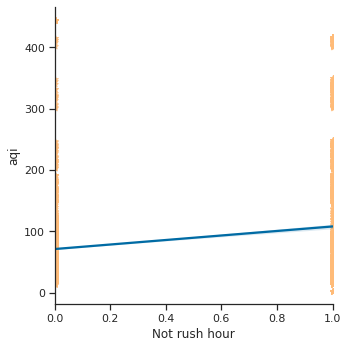

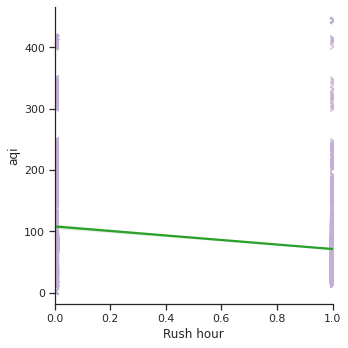

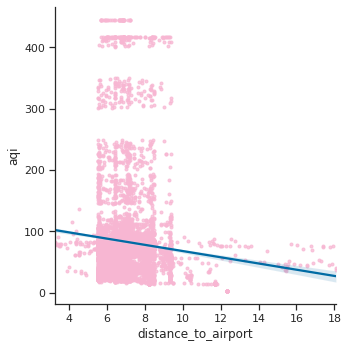

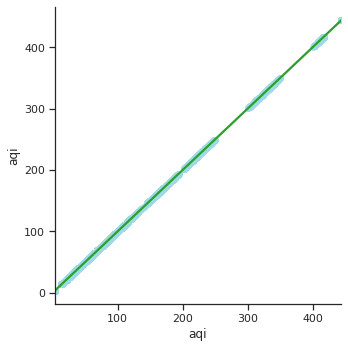

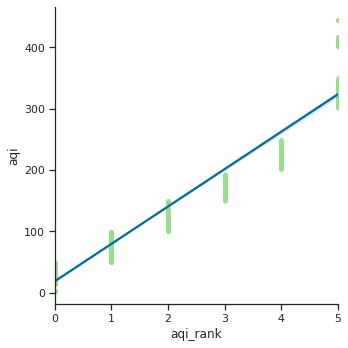

In [41]:
# Visualize linear relationships between each feature and AQI values
marker_list = ['x', 'o', '*','.']
sns.set(style='ticks', color_codes=True)
for i in MNR_air_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1) 
    sns.lmplot(x=i, y='aqi', data = MNR_air_sensor_data_resampled_processed_combine_drop, 
               scatter_kws = {'color':scatter_colors[a], 'alpha': 0.75}, line_kws={'color': line_colors[b]}, markers=marker_list[c])


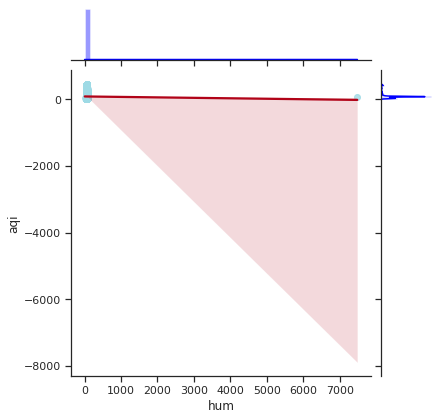

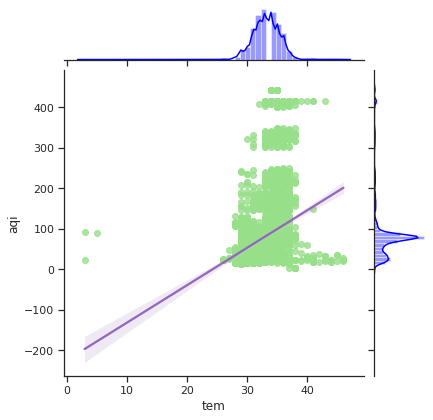

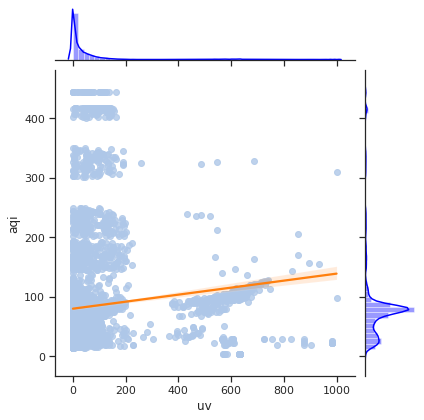

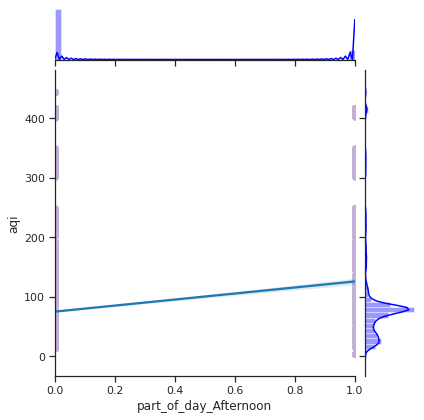

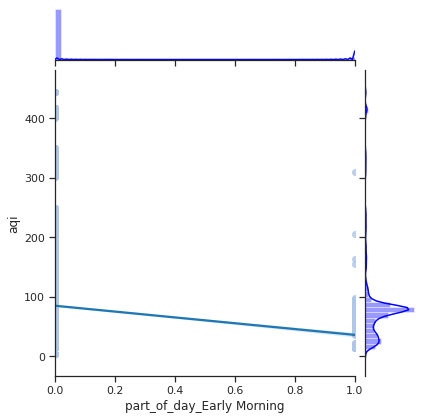

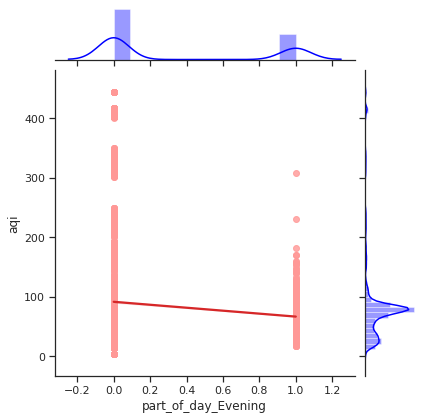

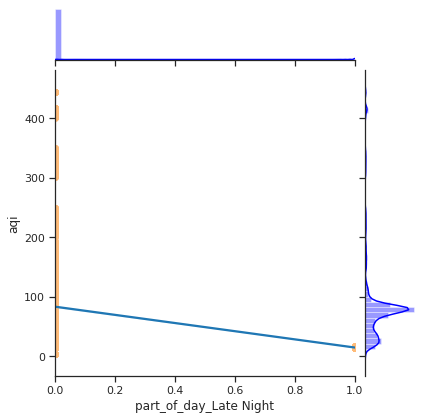

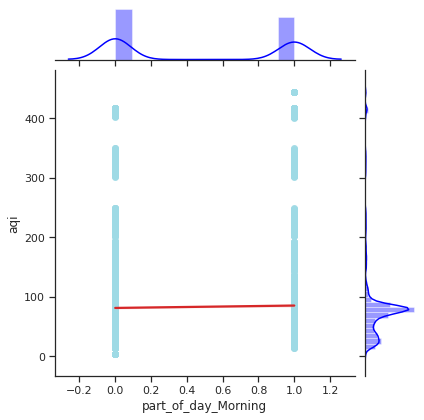

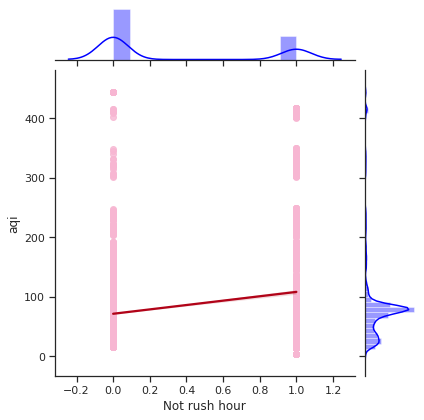

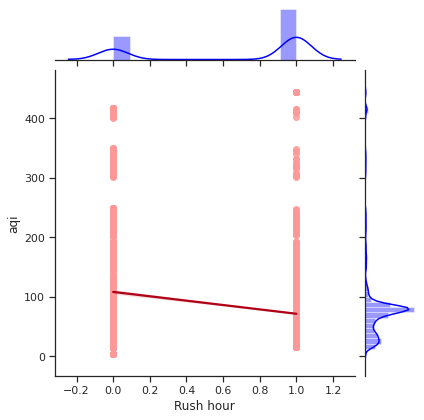

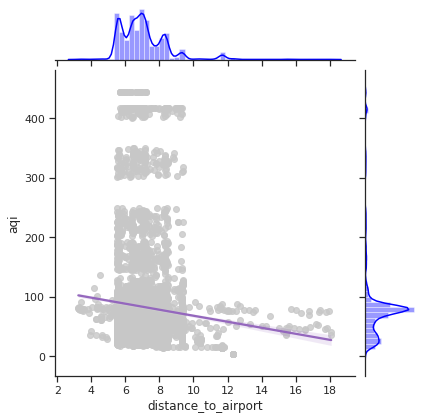

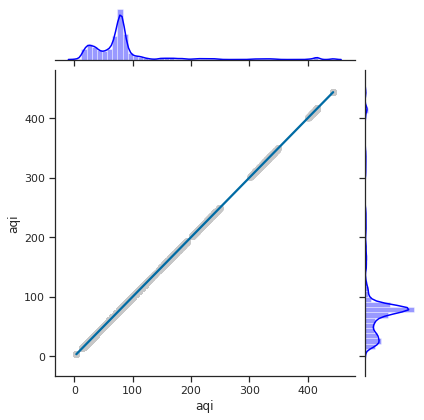

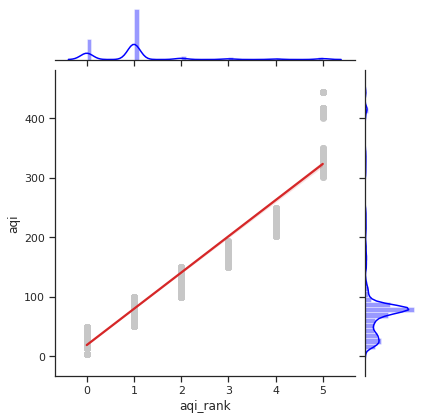

In [42]:
sns.set(style='ticks', color_codes=True)
for i in MNR_air_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi', data = MNR_air_sensor_data_resampled_processed_combine_drop, kind ='reg', color = 'blue',
                  joint_kws={'line_kws':{'color':line_colors[b]}, 
                             'scatter_kws':{'color':scatter_colors[a]}})

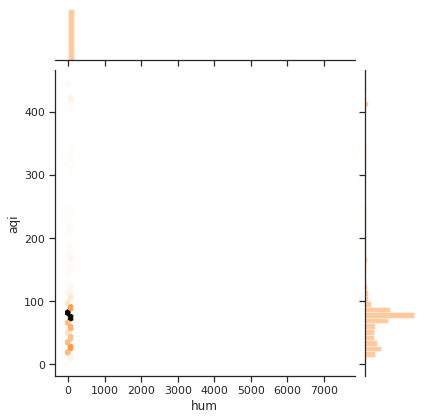

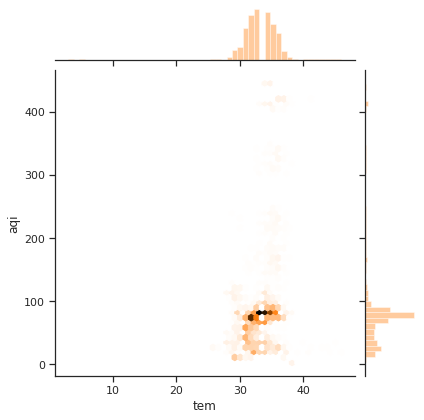

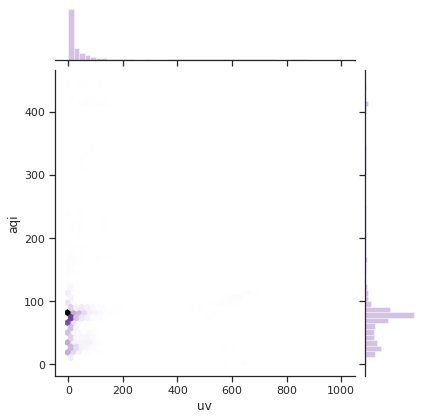

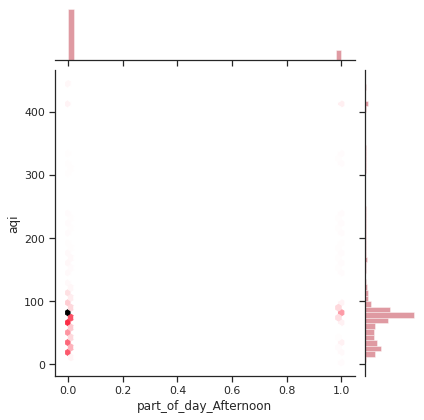

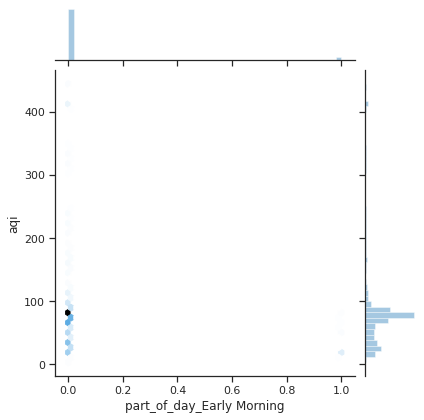

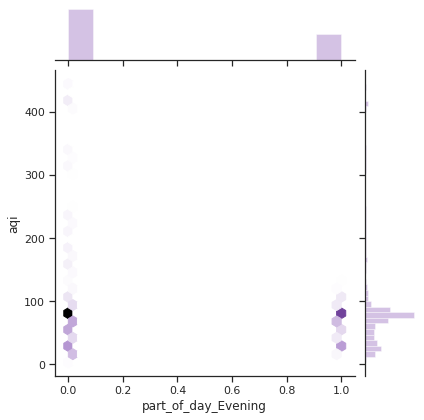

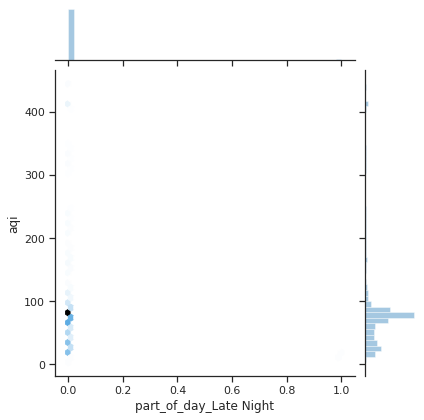

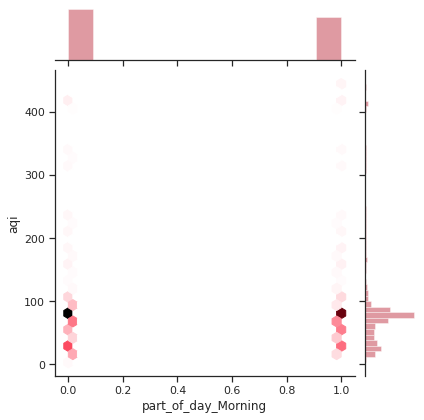

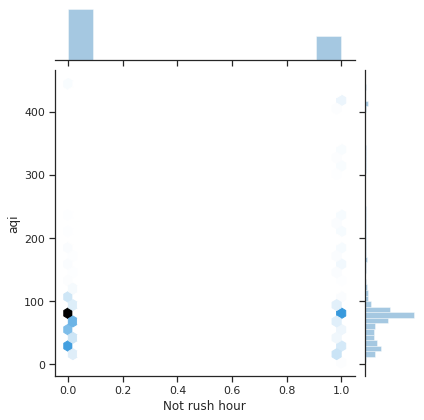

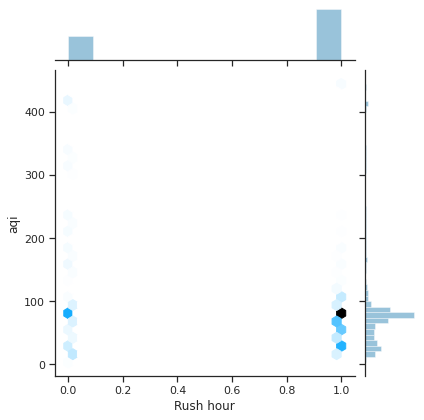

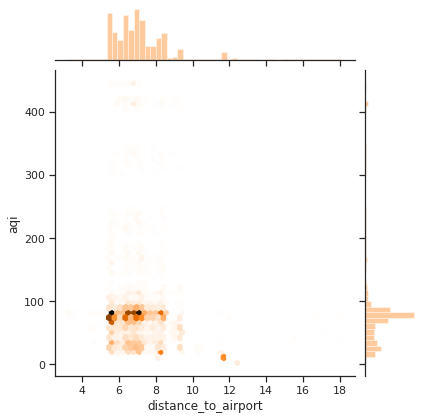

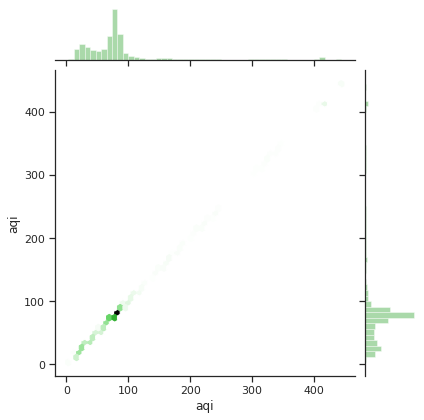

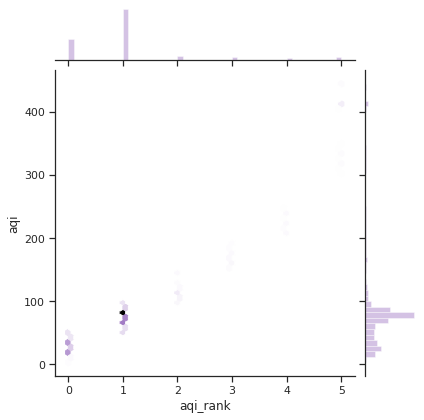

In [43]:
sns.set(style='ticks', color_codes=True)
for i in MNR_air_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi', data = MNR_air_sensor_data_resampled_processed_combine_drop, kind ='hex', color = line_colors[b])

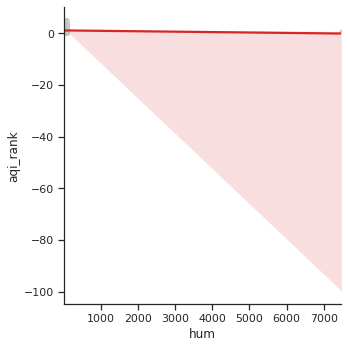

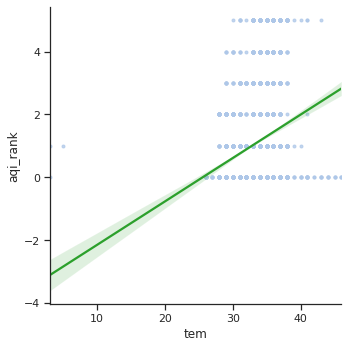

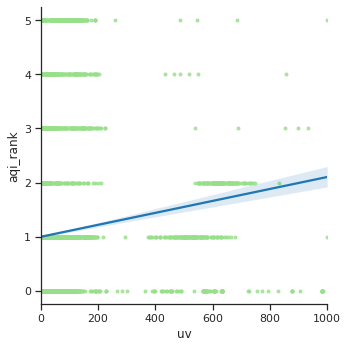

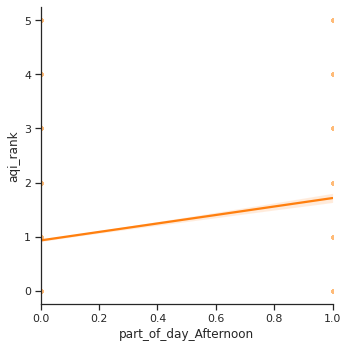

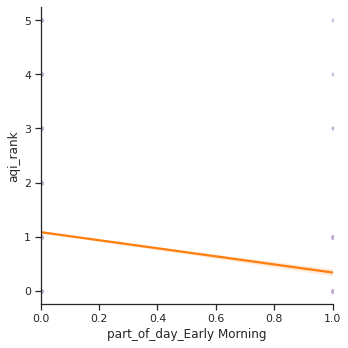

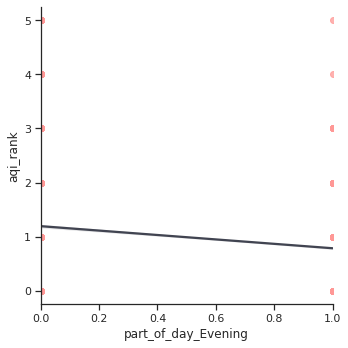

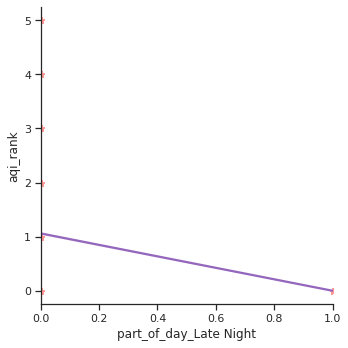

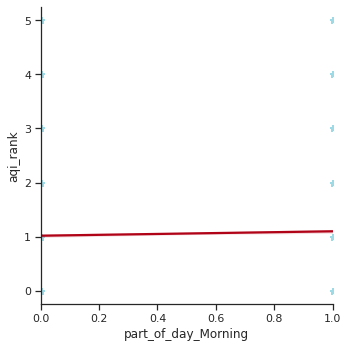

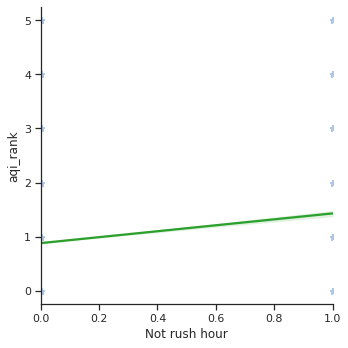

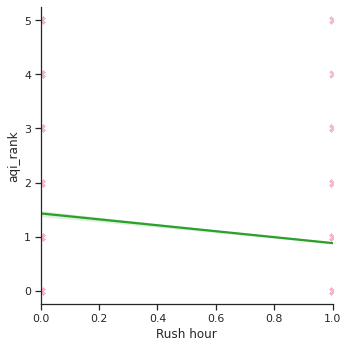

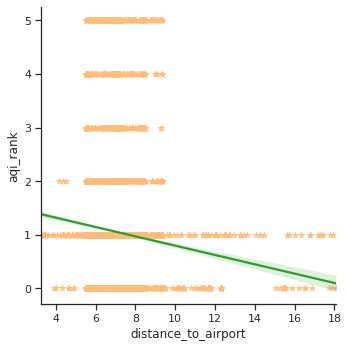

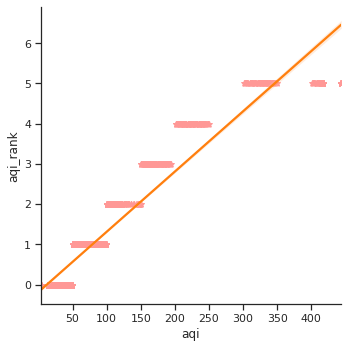

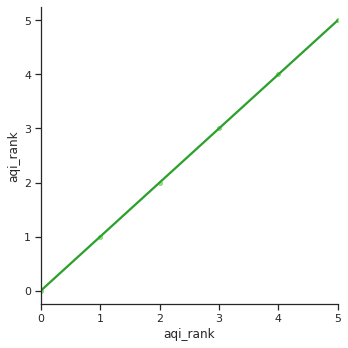

In [44]:
# Visualize linear relationships between each feature and AQI ranks
marker_list = ['x', 'o', '*','.']
sns.set(style='ticks', color_codes=True)
for i in MNR_air_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1) 
    sns.lmplot(x=i, y='aqi_rank', data = MNR_air_sensor_data_resampled_processed_combine_drop, 
               scatter_kws = {'color':scatter_colors[a], 'alpha': 0.75}, line_kws={'color': line_colors[b]}, markers=marker_list[c])


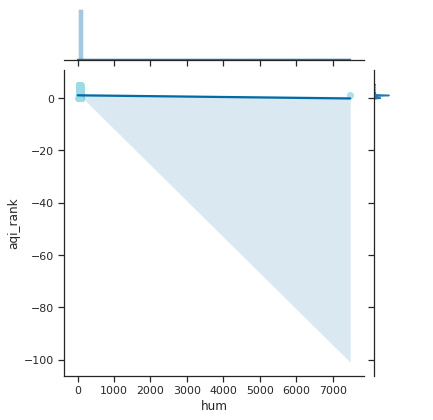

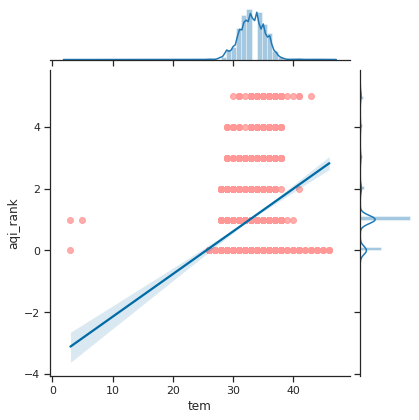

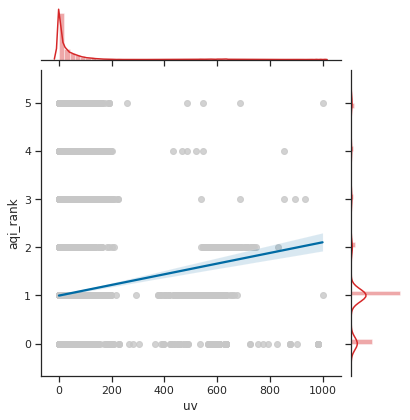

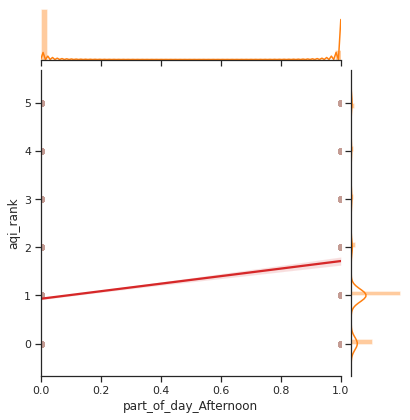

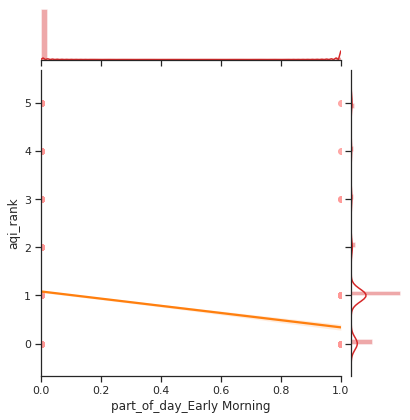

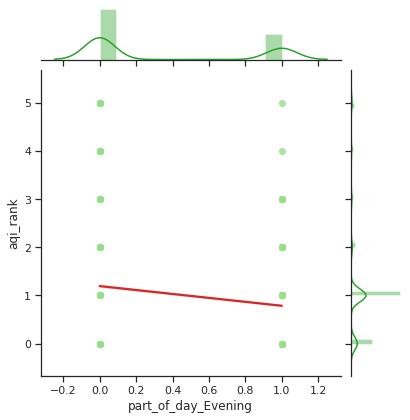

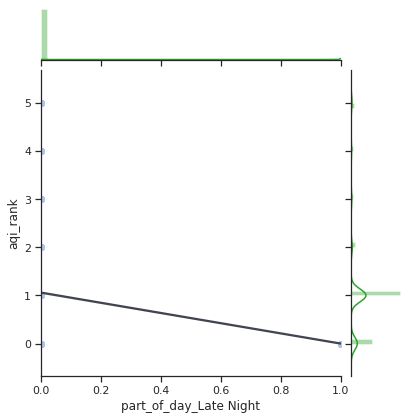

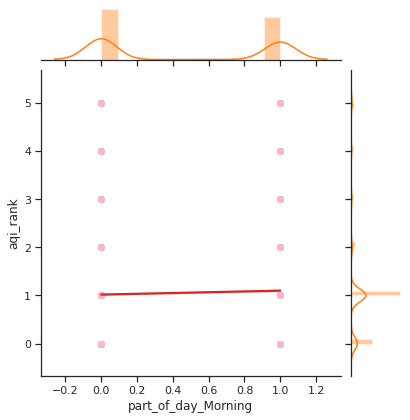

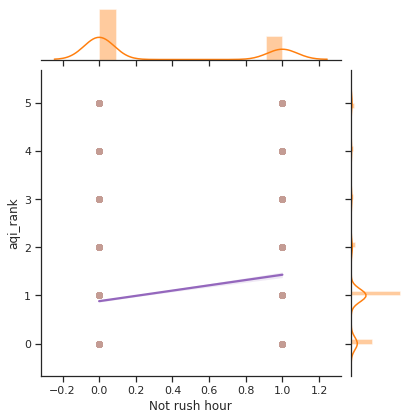

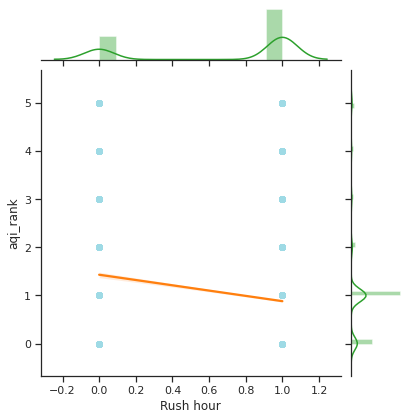

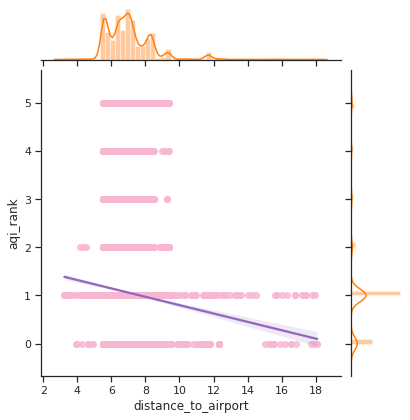

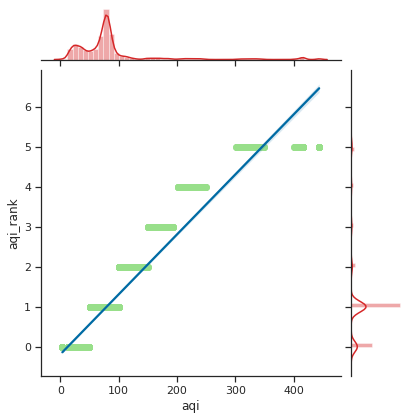

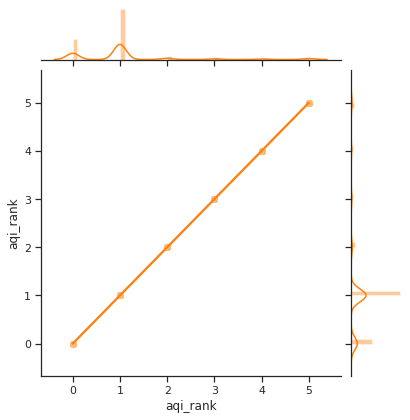

In [45]:
sns.set(style='ticks', color_codes=True)
for i in MNR_air_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi_rank', data = MNR_air_sensor_data_resampled_processed_combine_drop, kind ='reg', color = line_colors[c],
                  joint_kws={'line_kws':{'color':line_colors[b]}, 
                             'scatter_kws':{'color':scatter_colors[a]}})

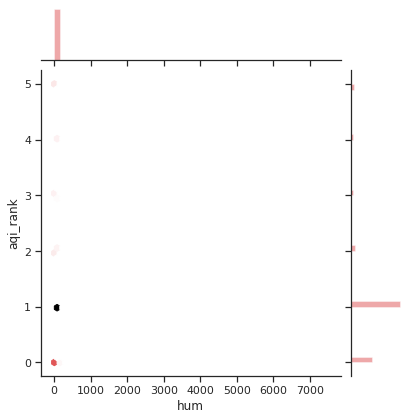

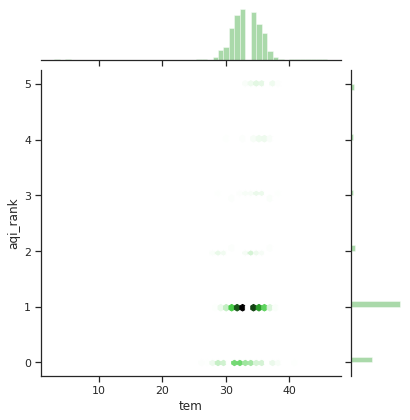

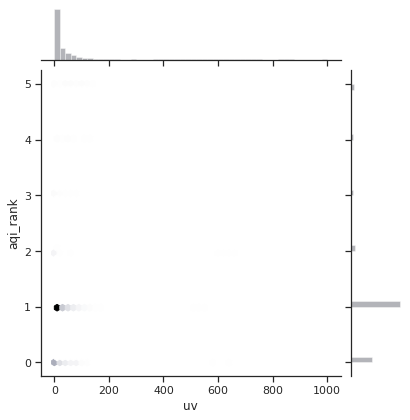

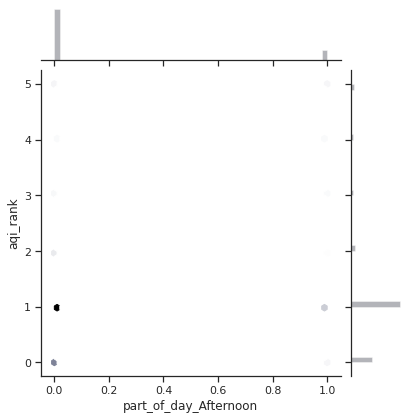

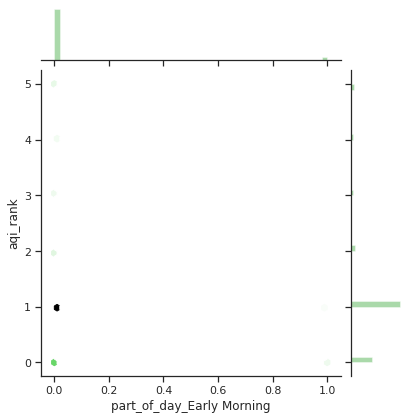

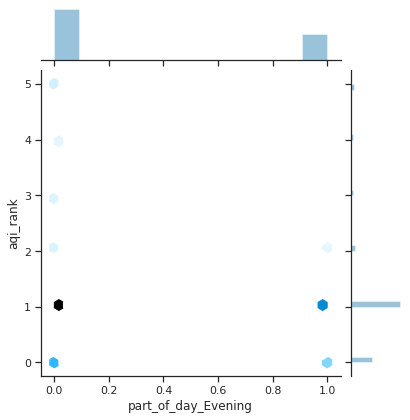

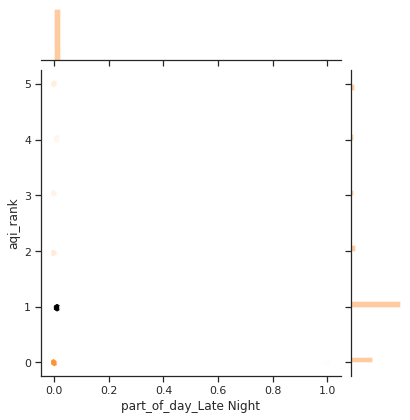

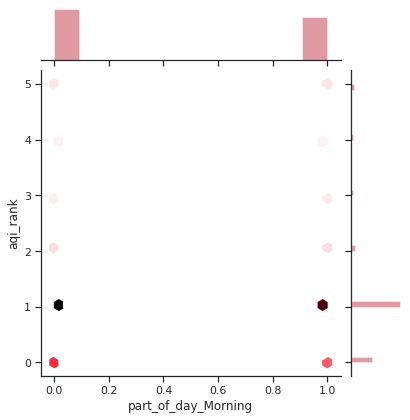

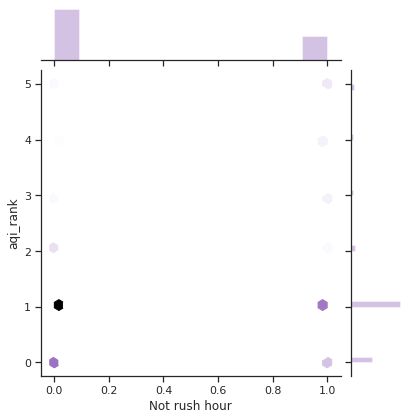

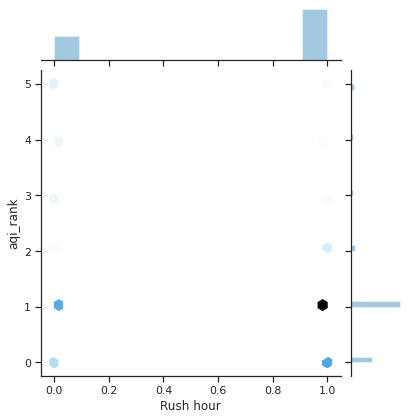

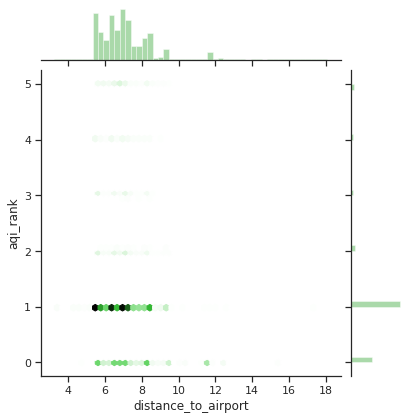

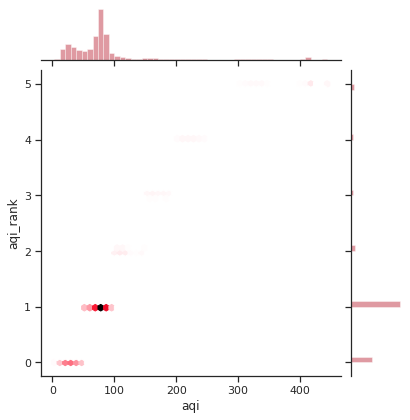

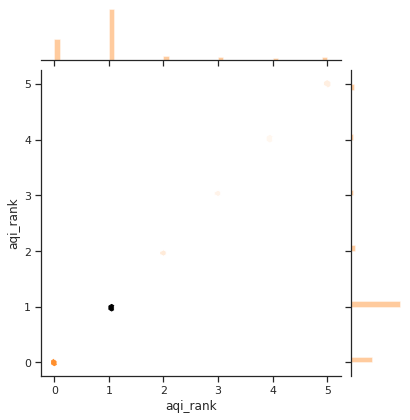

In [46]:
sns.set(style='ticks', color_codes=True)
for i in MNR_air_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi_rank', data = MNR_air_sensor_data_resampled_processed_combine_drop, kind ='hex', color = line_colors[b])